# Titanic Survival Exploration

## Data Description

### Overview

The data has been split into two groups:

* training set (train.csv)
* test set (test.csv)

The training set should be used to build your machine learning models. For the training set, we provide the outcome (also known as the “ground truth”) for each passenger. Your model will be based on “features” like passengers’ gender and class. You can also use feature engineering to create new features.

The test set should be used to see how well your model performs on unseen data. For the test set, we do not provide the ground truth for each passenger. It is your job to predict these outcomes. For each passenger in the test set, use the model you trained to predict whether or not they survived the sinking of the Titanic.

We also include gender_submission.csv, a set of predictions that assume all and only female passengers survive, as an example of what a submission file should look like.

## Data Dictionary

|Variable|Definition|Key|
|----------|------------|-----|
| survival | Survival|0 = No, 1 = Yes|
|pclass|Ticket class|1 = 1st, 2 = 2nd, 3 = 3rd|
|sex|Sex| | 
|Age|Age in years| |
|sibsp|# of siblings / spouses aboard the Titanic| |
|parch|# of parents / children aboard the Titanic| |
|ticket|Ticket number| |
|fare|Passenger fare| |
|cabin|Cabin number| |
|embarked|Port of Embarkation|C = Cherbourg, Q = Queenstown, S = Southampton|

## Variable Notes

pclass: A proxy for socio-economic status (SES)
* 1st = Upper
* 2nd = Middle
* 3rd = Lower

**age:** Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5

**sibsp:** The dataset defines family relations in this way...
Sibling = brother, sister, stepbrother, stepsister
Spouse = husband, wife (mistresses and fiancés were ignored)

**parch:** The dataset defines family relations in this way...
Parent = mother, father
Child = daughter, son, stepdaughter, stepson
Some children travelled only with a nanny, therefore parch=0 for them.

In [11]:
import pandas as pd
import numpy as np
import missingno as msno
import matplotlib.pyplot as plt
%matplotlib inline

## Load the Dataset

In [2]:
data=pd.read_csv('train.csv')
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Missing Data Visualization

Features with missing data (%)
* Cabin 77.10 
* Age 19

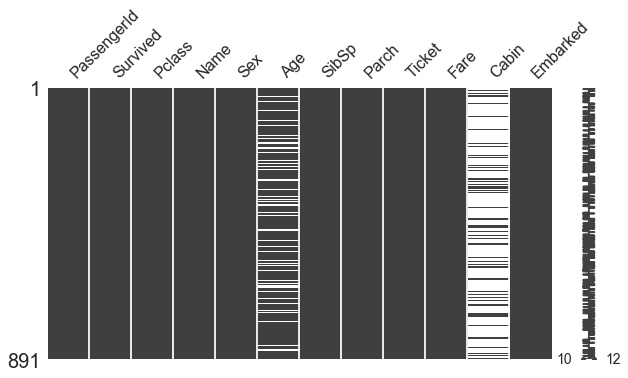

In [3]:
msno.matrix(data,figsize=(10,5))

## Nullity Correaltion

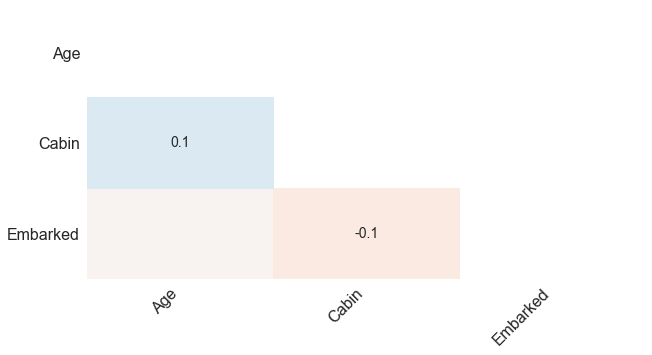

In [4]:
msno.heatmap(data,figsize=(10,5))

In [5]:
# To check how many columns have missing values
def show_missing():
    missing=data.columns[data.isnull().any()].tolist()
    return missing

print('Data set size: ',data.shape[0])
print('Columns that are having missing data(%):')
data[show_missing()].isnull().sum()/data.shape[0]*100

Data set size:  891
Columns that are having missing data(%):


Age         19.865320
Cabin       77.104377
Embarked     0.224467
dtype: float64

## Descriptive Statistics

In [6]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
PassengerId,891.0,446.000000,257.353842,1.00,223.5000,446.0000,668.5,891.0000
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


In [94]:
# data[data.Survived==0].Age.sort_values(ascending=False)
data[(data.Survived==1) & (data.Sex=='female')].shape[0]

233

## Data Set Distribution

/anaconda/lib/python3.6/site-packages/pandas/plotting/_core.py:178: UserWarning: 'colors' is being deprecated. Please use 'color'instead of 'colors'
  warnings.warn(("'colors' is being deprecated. Please use 'color'"


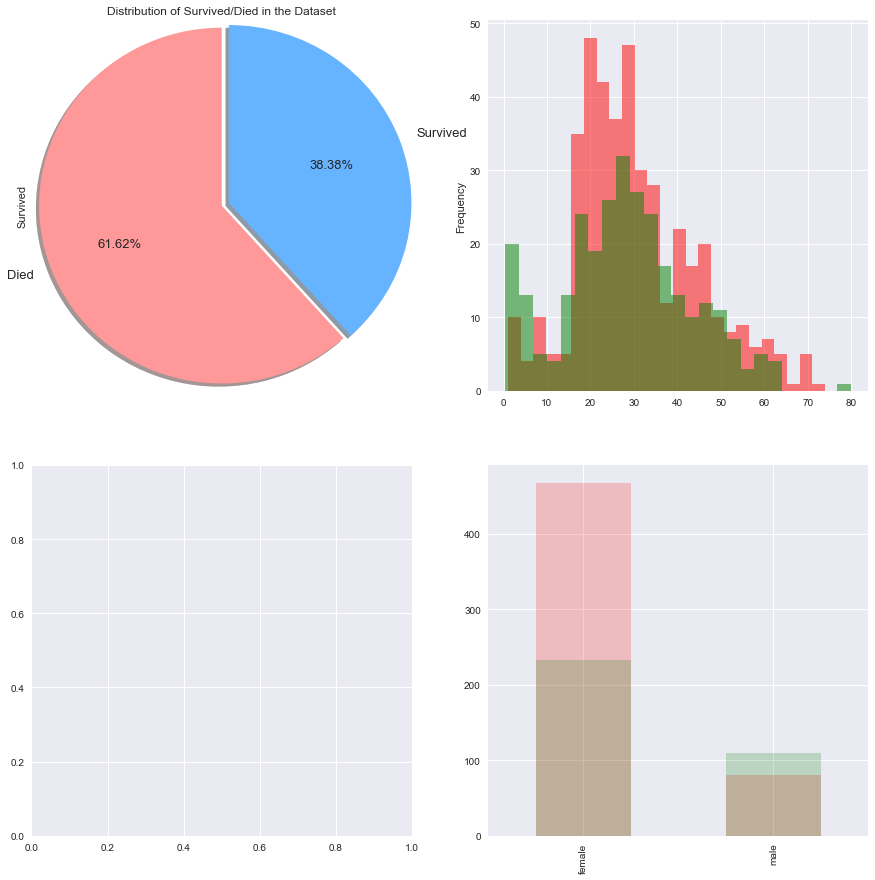

In [91]:
fig,axes=plt.subplots(nrows=2,ncols=2)
colors = ['#ff9999','#66b3ff']
labels='Died','Survived'
data.Survived.value_counts().plot(kind='pie',
                                  autopct='%2.2f%%',
                                  figsize=(15,15),
                                  explode = (0, 0.05),
                                  startangle=90,
                                  shadow=True,radius=1.2,
                                  fontsize=13,
#                                   textprops={'weight': 'bold'},
                                  labels=labels,
                                  colors=colors,
                                  title='Distribution of Survived/Died in the Dataset',ax=axes[0,0])
data[data.Survived==0].Age.plot(kind='hist',ax=axes[0,1],colors=['r'],alpha=0.5,label='Died',facecolor='red',bins=25,stacked=True)
data[data.Survived==1].Age.plot(kind='hist',ax=axes[0,1],colors=['g'],alpha=0.5,label='Survived',bins=25,stacked=True)

data[data.Survived==0].Sex.value_counts().plot(kind='bar',ax=axes[1,1],colors=['r'],alpha=0.2,label='Died',facecolor='red',stacked=True)
data[data.Survived==1].Sex.value_counts().plot(kind='bar',ax=axes[1,1],colors=['g'],alpha=0.2,label='Survived',stacked=True)

## Data Imputataion Strategy
There are 3 features with missing Data:
1. Age - 19.90% - can be imptuted
2. Cabin - 77.10% - can't be imputed as the % of missing data is more
3. Embarked - 0.22% - can drop records with missing this feature or can be imputed

## Age of Passengers (Survived)

In [60]:
# data[data.Survived==0].Age.value_counts().sort_values(ascending=False)

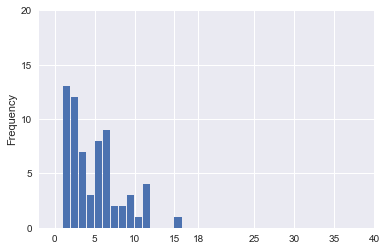

In [8]:
data[data.Survived==1].Age.value_counts().plot(kind='hist',bins=range(0,39),width=0.9,xticks=[0,5,10,15,18,25,30,35,40],yticks=[0,5,10,15,20])

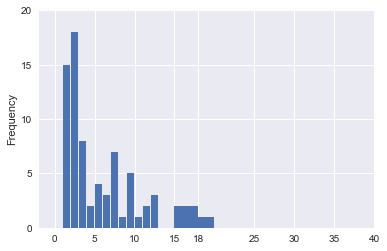

In [9]:
data[data.Survived==0].Age.value_counts().plot(kind='hist',bins=range(0,39),width=0.9,xticks=[0,5,10,15,18,25,30,35,40],yticks=[0,5,10,15,20])

In [10]:
ax = sns.countplot(x="Sex", data=data,linewidth=5,edgecolor=sns.color_palette("dark", 3))

NameError: name 'sns' is not defined

In [ ]:
data.Age.value_counts().plot(kind='bar')

## Nullity Correlation Visualization

In [ ]:
msno.heatmap(data,figsize=(6,6))

## Derive Title from Name Feature

In [ ]:
import string
def substrings_in_string(big_string,substrings):
    for substring in substrings:
        if big_string.find(substring)!=-1:
            return substring
    return np.nan

title_list=['Mrs', 'Mr', 'Master', 'Miss', 'Major', 'Rev',
                    'Dr', 'Ms', 'Mlle','Col', 'Capt', 'Mme', 'Countess',
                    'Don', 'Jonkheer']

data['Title']=data['Name'].map(lambda x:substrings_in_string(x,title_list))

In [ ]:
data.head()

## Calculate the Median Age for each Title

In [ ]:
data[~data.Age.isnull()].sample(5)

In [ ]:
temp=data[~data.Age.isnull()]
age_dict={}
for title in title_list:
    age_dict[title]={np.min((temp[temp.Title==title].Age)),\
                     np.median((temp[temp.Title==title].Age)),\
                    np.max((temp[temp.Title==title].Age))}

In [ ]:
age_dict

## Transform Data

**Sex**
* Male : 1
* Female : 0

In [ ]:
data.Sex=data.Sex.apply(lambda x: 1 if x=='male' else 0)

In [ ]:
data.head()

In [ ]:
sns.distplot(data.Fare)